# Exploring the 2015 UCI downhill mountain bike world cup with Pandas

I figured I'd try using Pandas to dive into the data and get a few interesting insights into the World Cup season from this year as a demonstration of what Pandas can do. Pandas is a really nice data anlaysis library for Python. First we'll need to `import` it. The standard convention is to use hte alias `pd` like so:

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [6]:
df = pd.read_json('seasonData_flat.json')
df = df[df['category'] == 'Men']
df.head()

,Nationality,category,competition,finishTime,name,points,position,roundNumber,runKind,sector1,...,split1Gap,split1Rank,split2,split2Gap,split2Rank,split3,split3Gap,split3Rank,venue,year
0,FRA,Men,World Cup,3:03.908,Loic BRUNI,50,1,1,Qualifying,01:06.391,...,0.000,1,02:06.607,0.000,1,03:03.908,0.000,1,Lourdes,2015
1,GBR,Men,World Cup,3:08.854,Mike JONES (elt),17,8,1,Qualifying,01:08.802,...,2.411,18,02:11.433,4.826,13,03:08.854,4.946,8,Lourdes,2015
2,GBR,Men,World Cup,3:15.213,Danny HART,0,43,1,Qualifying,01:08.137,...,1.746,13,02:11.199,4.592,12,03:15.213,11.305,43,Lourdes,2015
3,GBR,Men,World Cup,3:11.278,Sam DALE (elt),6,19,1,Qualifying,01:08.858,...,2.467,19,02:12.490,5.883,21,03:11.278,7.370,19,Lourdes,2015
4,GBR,Men,World Cup,3:09.187,Brendan FAIRCLOUGH,16,9,1,Qualifying,01:08.504,...,2.113,15,02:09.923,3.316,8,03:09.187,5.279,9,Lourdes,2015


In [27]:
top20Men = df[['name', 'Nationality', 'points']].groupby(['name', 'Nationality'], as_index=False).sum().sort_values('points', ascending=False).head(20)
top20Men

,name,Nationality,points
0,Aaron GWIN,USA,1329
172,Loic BRUNI,FRA,1059
312,Troy BROSNAN,AUS,1013
100,Greg MINNAAR,RSA,1006
146,Josh BRYCELAND,GBR,836
92,Gee ATHERTON,GBR,760
54,Danny HART,GBR,624
188,Marcelo GUTIERREZ VILLEGAS,COL,604
277,Sam BLENKINSOP,NZL,546
33,Brook MACDONALD,NZL,542


OK, so far so good. What else could we look at? I wonder if there were people that did better in qualification than the actual races. Let's have a look at points scoring in qualification and get the top 10 for just qualification points:

In [16]:
df_quali = df[df['runKind'] == 'Qualifying']
df_quali[['name', 'Nationality', 'points']].groupby(['name', 'Nationality'], as_index=False).sum().sort_values('points', ascending=False).head(10)

,name,Nationality,points
172,Loic BRUNI,FRA,229
312,Troy BROSNAN,AUS,208
0,Aaron GWIN,USA,194
146,Josh BRYCELAND,GBR,137
46,Connor FEARON,AUS,134
100,Greg MINNAAR,RSA,125
54,Danny HART,GBR,116
275,Rémi THIRION,FRA,110
92,Gee ATHERTON,GBR,108
223,Mike JONES (elt),GBR,97


In [91]:
df_finals = df[df['runKind'] == 'Qualifying']
melted = pd.melt(df_finals, id_vars=['name', 'venue'], value_vars=['sector1Rank','sector2Rank','sector3Rank'])
positions = pd.pivot_table(melted, values='value', index='name', columns=['venue','variable']).reset_index()
positions = pd.merge(positions, top20Men, how='inner', on='name')
positions = positions.sort_values('points', ascending=False)
del positions[('name', '')]
del positions['points']
del positions['Nationality']
positions = positions.set_index('name')
positions = positions.fillna(999)
positions

,"(Fort William, sector1Rank)","(Fort William, sector2Rank)","(Fort William, sector3Rank)","(Lenzeheide, sector1Rank)","(Lenzeheide, sector2Rank)","(Lenzeheide, sector3Rank)","(Leogang, sector1Rank)","(Leogang, sector2Rank)","(Leogang, sector3Rank)","(Lourdes, sector1Rank)",...,"(Mont Sainte Anne, sector3Rank)","(Val Di Sole, sector1Rank)","(Val Di Sole, sector2Rank)","(Val Di Sole, sector3Rank)","(Vallnord, sector1Rank)","(Vallnord, sector2Rank)","(Vallnord, sector3Rank)","(Windham, sector1Rank)","(Windham, sector2Rank)","(Windham, sector3Rank)"
name,,,,,,,,,,,,,,,,,,,,,
Aaron GWIN,6,12,19,3,3,4,4,1,2,999,...,999,1,4,1,5,91,1,1,1,8
Loic BRUNI,11,2,18,4,2,2,1,2,159,1,...,27,2,3,3,1,1,3,2,3,2
Troy BROSNAN,3,7,8,13,6,7,17,10,11,5,...,1,5,1,2,3,2,29,3,2,3
Greg MINNAAR,17,5,9,7,8,5,9,8,4,53,...,5,4,5,8,2,3,5,5,4,12
Josh BRYCELAND,999,999,999,1,4,20,3,5,12,7,...,14,8,10,32,10,5,4,6,6,23
Gee ATHERTON,5,6,41,5,10,22,5,4,6,999,...,9,6,2,17,6,90,56,4,5,15
Danny HART,8,3,22,23,9,9,999,999,999,13,...,4,3,6,11,7,11,18,8,27,28
Marcelo GUTIERREZ VILLEGAS,2,11,20,21,20,23,10,13,19,32,...,2,14,9,18,4,12,10,21,15,9
Sam BLENKINSOP,35,4,7,10,13,1,35,19,9,8,...,3,9,8,4,12,4,13,43,12,7


In [103]:
cols = list(positions.columns.values)

myorder=[9,10,11,0,1,2,6,7,8,3,4,5,12,13,14,21,22,23,15,16,17,18,19,20]
cols = [ cols[i] for i in myorder]

positions = positions[cols]
positions

,"(Lourdes, sector1Rank)","(Lourdes, sector2Rank)","(Lourdes, sector3Rank)","(Fort William, sector1Rank)","(Fort William, sector2Rank)","(Fort William, sector3Rank)","(Leogang, sector1Rank)","(Leogang, sector2Rank)","(Leogang, sector3Rank)","(Lenzeheide, sector1Rank)",...,"(Mont Sainte Anne, sector3Rank)","(Windham, sector1Rank)","(Windham, sector2Rank)","(Windham, sector3Rank)","(Val Di Sole, sector1Rank)","(Val Di Sole, sector2Rank)","(Val Di Sole, sector3Rank)","(Vallnord, sector1Rank)","(Vallnord, sector2Rank)","(Vallnord, sector3Rank)"
name,,,,,,,,,,,,,,,,,,,,,
Aaron GWIN,999,999,999,6,12,19,4,1,2,3,...,999,1,1,8,1,4,1,5,91,1
Loic BRUNI,1,1,3,11,2,18,1,2,159,4,...,27,2,3,2,2,3,3,1,1,3
Troy BROSNAN,5,16,6,3,7,8,17,10,11,13,...,1,3,2,3,5,1,2,3,2,29
Greg MINNAAR,53,67,80,17,5,9,9,8,4,7,...,5,5,4,12,4,5,8,2,3,5
Josh BRYCELAND,7,2,5,999,999,999,3,5,12,1,...,14,6,6,23,8,10,32,10,5,4
Gee ATHERTON,999,999,999,5,6,41,5,4,6,5,...,9,4,5,15,6,2,17,6,90,56
Danny HART,13,17,107,8,3,22,999,999,999,23,...,4,8,27,28,3,6,11,7,11,18
Marcelo GUTIERREZ VILLEGAS,32,20,70,2,11,20,10,13,19,21,...,2,21,15,9,14,9,18,4,12,10
Sam BLENKINSOP,8,57,25,35,4,7,35,19,9,10,...,3,43,12,7,9,8,4,12,4,13


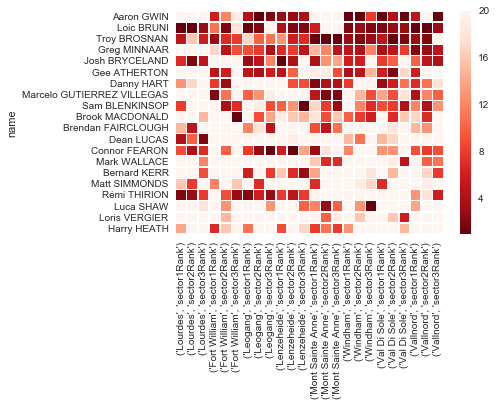

In [106]:
sns.heatmap(positions, vmin=1, vmax=20, linewidths=.5,cmap="Reds_r")